In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
df = pd.read_csv('/content/glass.csv')
# choose numeric features
features = df.drop('Type', axis=1)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_df.head())

         RI        Na        Mg        Al        Si         K        Ca   Ba  \
0  0.432836  0.437594  1.000000  0.252336  0.351786  0.009662  0.308550  0.0   
1  0.283582  0.475188  0.801782  0.333333  0.521429  0.077295  0.223048  0.0   
2  0.220808  0.421053  0.790646  0.389408  0.567857  0.062802  0.218401  0.0   
3  0.285777  0.372932  0.821826  0.311526  0.500000  0.091787  0.259294  0.0   
4  0.275241  0.381955  0.806236  0.295950  0.583929  0.088567  0.245353  0.0   

    Fe  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  


In [ ]:
from sklearn.preprocessing import StandardScaler
feature = df[['RI']]  # select the feature
scaler = StandardScaler()
df['RI_standardized'] = scaler.fit_transform(feature)
# check results
print(df[['RI', 'RI_standardized']].head())
print("Mean:", round(df['RI_standardized'].mean(), 4))
print("Std Dev:", round(df['RI_standardized'].std(), 4))

        RI  RI_standardized
0  1.52101         0.872868
1  1.51761        -0.249333
2  1.51618        -0.721318
3  1.51766        -0.232831
4  1.51742        -0.312045
Mean: -0.0
Std Dev: 1.0023


In [ ]:
import numpy as np
features = df.drop('Type', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
# add target column
scaled_df['Type'] = df['Type']
scaled_df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1


In [ ]:
from sklearn.preprocessing import RobustScaler #RobustScaler method:
import pandas as pd
df = pd.read_csv('glass.csv')
feature = df[['RI']]
robust_scaler = RobustScaler()
# fit and transform
RI_robust = robust_scaler.fit_transform(feature)
# add to dataframe
df['RI_robust_scaled'] = RI_robust
print(df[['RI', 'RI_robust_scaled']].head())

        RI  RI_robust_scaled
0  1.52101          1.263757
1  1.51761         -0.026565
2  1.51618         -0.569260
3  1.51766         -0.007590
4  1.51742         -0.098672


In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
features = df.drop('Type', axis=1)

robust_scaler = RobustScaler()
scaled_features = robust_scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Type'] = df['Type']
scaled_df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,RI_standardized,Type
0,1.263757,0.370572,0.680135,-0.590909,-1.250774,-1.015385,0.160858,0.0,0.0,1.263757,1
1,-0.026565,0.643052,0.080808,0.000000,-0.074303,-0.153846,-0.825737,0.0,0.0,-0.026565,1
2,-0.569260,0.250681,0.047138,0.409091,0.247678,-0.338462,-0.879357,0.0,0.0,-0.569260,1
3,-0.007590,-0.098093,0.141414,-0.159091,-0.222910,0.030769,-0.407507,0.0,0.0,-0.007590,1
4,-0.098672,-0.032698,0.094276,-0.272727,0.359133,-0.010256,-0.568365,0.0,0.0,-0.098672,1


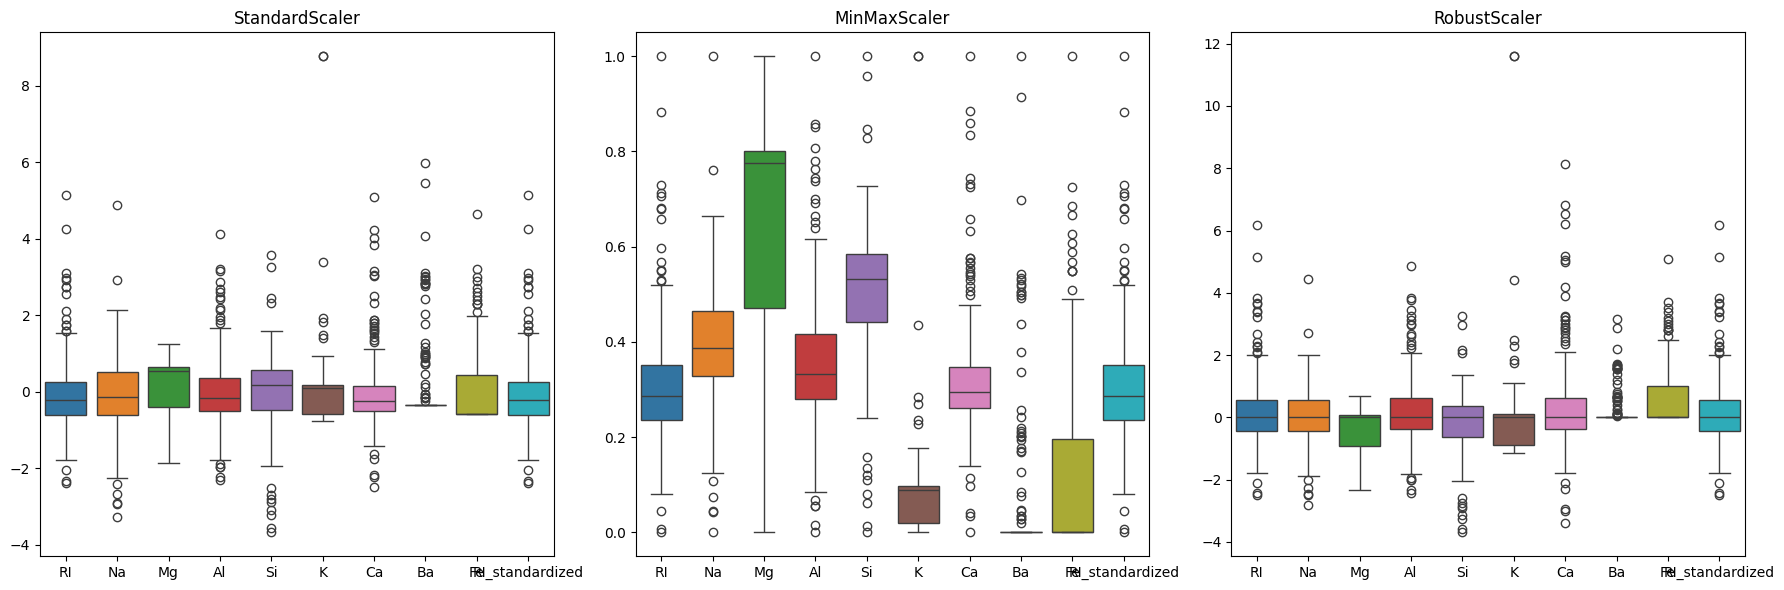

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# StandardScaler
std_scaler = StandardScaler()
features_std = std_scaler.fit_transform(features)
df_std = pd.DataFrame(features_std, columns=features.columns)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
features_mm = minmax_scaler.fit_transform(features)
df_mm = pd.DataFrame(features_mm, columns=features.columns)

# RobustScaler
robust_scaler = RobustScaler()
features_rb = robust_scaler.fit_transform(features)
df_rb = pd.DataFrame(features_rb, columns=features.columns)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_std)
plt.title("StandardScaler")

plt.subplot(1, 3, 2)
sns.boxplot(data=df_mm)
plt.title("MinMaxScaler")

plt.subplot(1, 3, 3)
sns.boxplot(data=df_rb)
plt.title("RobustScaler")

plt.tight_layout()
plt.show()
#Observations:

#StandardScaler: Outliers stretch the boxplot, some extreme points may go far.

#MinMaxScaler: Maps everything to 0–1, but outliers shrink most data values.

# RobustScaler: Less affected by outliers, median is at 0, IQR visible.

In [ ]:
import pandas as pd
from sklearn.preprocessing import Normalizer
df = pd.read_csv('/content/glass.csv')

# Select numeric features (exclude target)
features = df.drop('Type', axis=1)
# Create L2 normalizer
normalizer = Normalizer(norm='l2')
features_normalized = normalizer.transform(features)

# Convert back to DataFrame
df_normalized = pd.DataFrame(features_normalized, columns=features.columns)
df_normalized['Type'] = df['Type']
df_normalized.head()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.020625,0.184956,0.060884,0.014916,0.973323,0.000814,0.118648,0.0,0.0,1
1,0.020350,0.186259,0.048274,0.018237,0.975277,0.006437,0.104997,0.0,0.0,1
2,0.020282,0.180987,0.047487,0.020600,0.976368,0.005217,0.104071,0.0,0.0,1
3,0.020404,0.177605,0.049611,0.017344,0.976220,0.007663,0.110515,0.0,0.0,1
4,0.020279,0.177341,0.048378,0.016571,0.976647,0.007350,0.107848,0.0,0.0,1


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = pd.read_csv('/content/glass.csv')
features = df.drop('Type', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Set number of clusters (for example, 6)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(features_scaled)
# Cluster labels
labels = kmeans.labels_
# Add cluster labels to dataframe
df['Cluster'] = labels
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Cluster
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,2
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,2
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,2
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,2


In [ ]:
import pandas as pd
df = pd.read_csv('glass.csv')
print(df.isnull().sum())
# Drop rows with any NaN
df_clean = df.dropna()
print("Original shape:", df.shape)
print("After dropping rows with missing values:", df_clean.shape)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
Original shape: (214, 10)
After dropping rows with missing values: (214, 10)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
df = pd.read_csv('glass.csv')
features = df.drop('Type', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
true_value = features_scaled[0, 0]  # save original value
features_scaled[0, 0] = np.nan      # set as missing

# Create mean imputer
mean_imputer = SimpleImputer(strategy='mean')
# Impute missing values
features_imputed = mean_imputer.fit_transform(features_scaled)
print("True Value:", true_value)
print("Imputed Value:", features_imputed[0, 0])

True Value: 0.8728676458471423
Imputed Value: -0.004097970168325348
